# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [2]:
 data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

 ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
     filter(sports == 'Basketball') |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     select(year, institution_name, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** add the argument `weight = expenditure_usd` when you use `geom_bar` so the bar height reflects spending.)

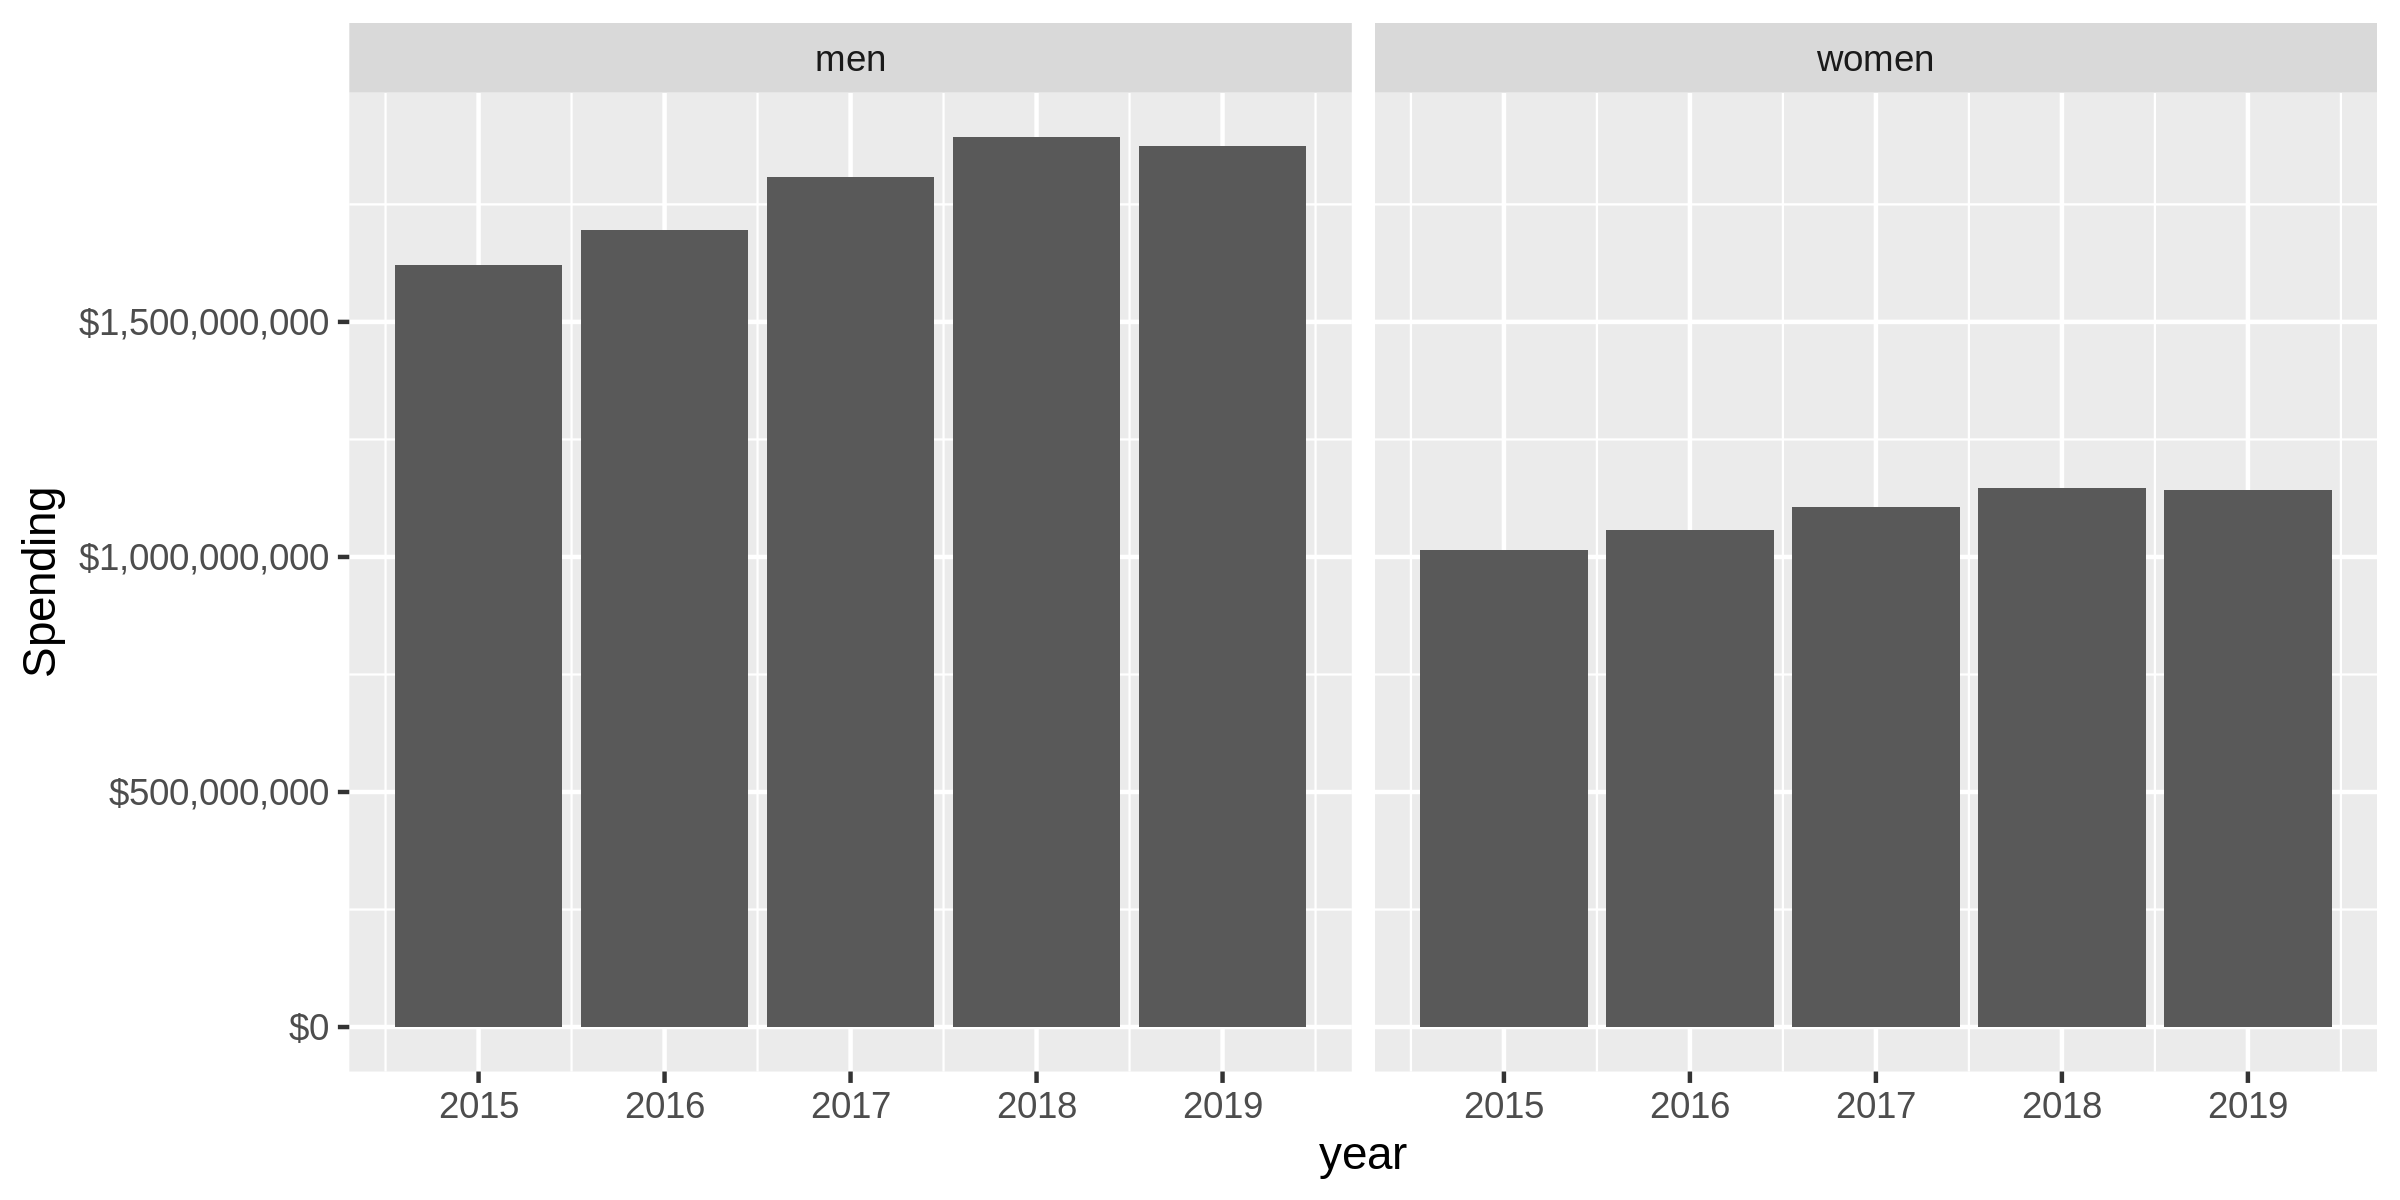

In [26]:
options (repr.plot.width = 8, repr.plot.hight = 4)

p = ggplot (ncaa_sports_spending, aes (x = year, weight = expenditure_usd ) )

p = p + geom_bar () + facet_wrap( ~ men_or_women )

p = p + labs (y = "Spending")

p = p + scale_y_continuous(labels = scales::dollar_format())

p


You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [23]:
 unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
     filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
     mutate(sports = fct_reorder(sports, exp_women)) |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     select(year, institution_name, sports, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
     filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

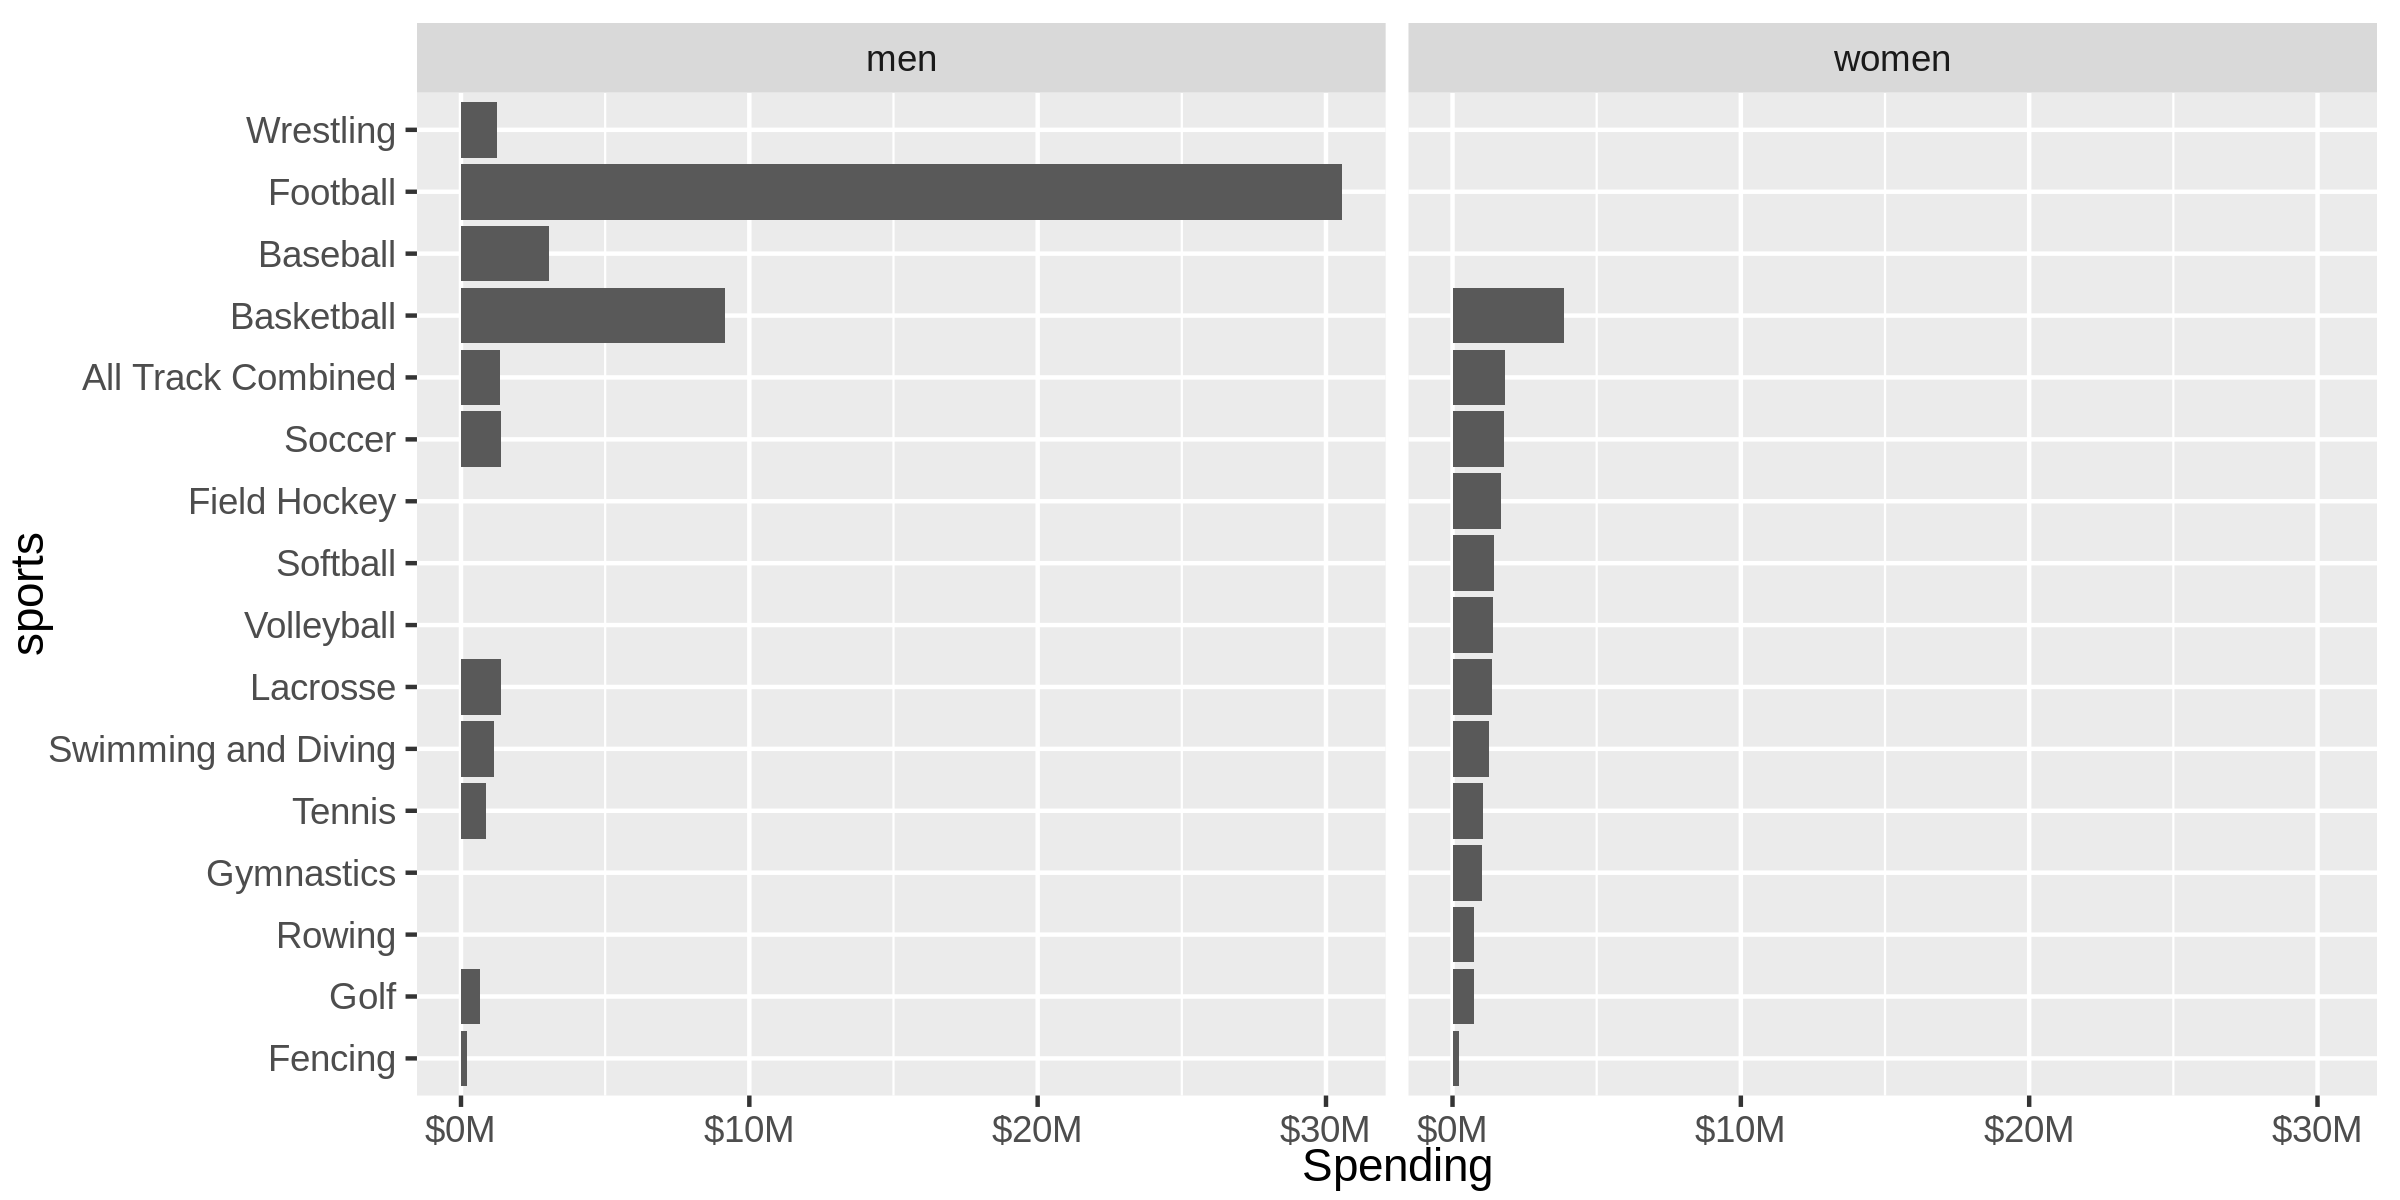

In [29]:
p2 = ggplot (unc_sports_spending_2019, aes(x= sports, weight = expenditure_usd / 1e6))

p2 = p2 + geom_bar() + facet_wrap( ~ men_or_women )

p2 = p2 + scale_y_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(y = 'Spending')

p2 = p2 + coord_flip()

p2



You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/unc_sports_spending.png). **Your chart does not need to look like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

# labs() is to label elements to the plot.
# We can use labs( x = ' ' ) to add new x axis label, use labs( y = ' ' ) new y axes label.
# labs( title = 'add a title above the plot' )
# labs( subtitle = 'add a subtitle below title' )
# labs( caption = 'add a caption below plot' )
# labs( alt = 'add alt text to the plot' )